### Multivariable Linear Regression model for investigation of blast performance

### Inputs paramterers given:
Burden in meteres(m)

spacing in meters(m)

Hole diameter in millimeters(mm)

bench height in meters(m)

Stemming in meters(m)

Maximum Charge per dekay in kilograms(kg)

Total charge in a blast in kilograms(kg)

Holedepth in meters(m)

### Outputs obtained

Mean Fragment Size (MFS)

We will develop a Linearly related model using python libraries that predicts the outcome of the behaviour of source variables given as input.

#### Step 1: Importing Libraries

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

#### Step 2: Loading and Analysing Data

In [14]:
data = pd.read_csv("C:\\Users\\babhi\\OneDrive\\Desktop\\AI-ML\\Linear Regression\\input blasting data.csv")

In [15]:
data.shape

(30, 14)

In [17]:
data



,"Burden, m","Spacing, m","Hole Dia, mm","Bench height, m","Stemming, m","Maximum Charge per delay, kg","Total Charge in a blast, kg","Hole Depth, m","Cup density, g/cc","Mean Fragment Size, D50,mm","Powder factor, m3/kg",Unnamed: 11,Unnamed: 12,Unnamed: 13
0,10.0,12.0,311.0,29,5.0,1385.00,187356.00,30.0,1.055,99.1000,1.56,NaN,NaN,spacing/burdern
1,8.0,9.5,269.0,24,5.0,3967.50,109513.20,25.0,0.979,411.8900,1.47,NaN,NaN,stemmin/bur
2,9.0,12.5,311.0,25,5.0,6853.00,108760.10,26.0,0.920,294.2032,1.80,NaN,NaN,burd/hol dia
3,10.0,12.0,311.0,24,5.0,3235.50,64950.75,25.0,0.905,56.6100,1.94,NaN,NaN,burd/bench height
4,8.5,9.0,269.0,24,5.0,7153.74,278835.60,24.5,0.909,354.9700,1.51,NaN,NaN,NaN
5,9.5,12.0,311.0,29,6.0,7996.00,377068.00,30.0,0.929,95.0300,1.59,NaN,NaN,NaN
6,8.0,10.0,269.0,27,5.5,3020.00,148135.50,28.5,0.982,713.4600,1.43,NaN,NaN,NaN
7,10.0,12.5,269.0,26,5.5,3600.00,230400.00,27.5,1.186,442.6300,1.80,NaN,NaN,NaN
8,10.0,12.0,311.0,28,5.5,2000.00,130161.00,29.0,0.957,858.9600,1.68,NaN,NaN,NaN
9,8.0,10.0,269.0,28,5.0,3703.00,377068.00,26.0,0.928,367.8000,1.73,NaN,NaN,NaN


In [20]:
modified_data = data.iloc[0:26,0:10]

In [26]:
modified_data = modified_data.drop(['Cup density, g/cc'],axis=1)

KeyError: "['Cup density, g/cc'] not found in axis"

In [27]:
modified_data.shape

(26, 9)

In [32]:
modified_data.iloc[0:26,0:8]

,"Burden, m","Spacing, m","Hole Dia, mm","Bench height, m","Stemming, m","Maximum Charge per delay, kg","Total Charge in a blast, kg","Hole Depth, m"
0,10.0,12.0,311.0,29,5.0,1385.00,187356.00,30.0
1,8.0,9.5,269.0,24,5.0,3967.50,109513.20,25.0
2,9.0,12.5,311.0,25,5.0,6853.00,108760.10,26.0
3,10.0,12.0,311.0,24,5.0,3235.50,64950.75,25.0
4,8.5,9.0,269.0,24,5.0,7153.74,278835.60,24.5
5,9.5,12.0,311.0,29,6.0,7996.00,377068.00,30.0
6,8.0,10.0,269.0,27,5.5,3020.00,148135.50,28.5
7,10.0,12.5,269.0,26,5.5,3600.00,230400.00,27.5
8,10.0,12.0,311.0,28,5.5,2000.00,130161.00,29.0
9,8.0,10.0,269.0,28,5.0,3703.00,377068.00,26.0


Checking for null values

In [48]:
modified_data.isnull().sum()

Burden, m                       0
Spacing, m                      0
Hole Dia, mm                    0
Bench height, m                 0
Stemming, m                     0
Maximum Charge per delay, kg    0
Total Charge in a blast, kg     0
Hole Depth, m                   0
Mean Fragment Size, D50,mm      0
dtype: int64

### Checking and changing data types

In [45]:
modified_data.dtypes

Burden, m                       float64
Spacing, m                      float64
Hole Dia, mm                    float64
Bench height, m                  object
Stemming, m                     float64
Maximum Charge per delay, kg    float64
Total Charge in a blast, kg     float64
Hole Depth, m                   float64
Mean Fragment Size, D50,mm      float64
dtype: object

In [46]:
modified_data['Bench height, m'] = modified_data['Bench height, m'].astype('float')

In [47]:
modified_data.dtypes

Burden, m                       float64
Spacing, m                      float64
Hole Dia, mm                    float64
Bench height, m                 float64
Stemming, m                     float64
Maximum Charge per delay, kg    float64
Total Charge in a blast, kg     float64
Hole Depth, m                   float64
Mean Fragment Size, D50,mm      float64
dtype: object

#### Checking for null values again after changing datatypes

In [49]:
modified_data.isnull().sum()

Burden, m                       0
Spacing, m                      0
Hole Dia, mm                    0
Bench height, m                 0
Stemming, m                     0
Maximum Charge per delay, kg    0
Total Charge in a blast, kg     0
Hole Depth, m                   0
Mean Fragment Size, D50,mm      0
dtype: int64

Here there are no null values, if there are any null values we will replace them with median of that particular column

In [51]:
modified_data.describe()


,"Burden, m","Spacing, m","Hole Dia, mm","Bench height, m","Stemming, m","Maximum Charge per delay, kg","Total Charge in a blast, kg","Hole Depth, m","Mean Fragment Size, D50,mm"
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.00000,26.000000
mean,9.692308,11.846154,302.923077,29.346154,5.634615,2696.240000,121102.188462,30.40000,439.268815
std,0.735893,1.046606,16.880576,4.204210,0.501153,1899.214951,96646.979260,4.31509,266.426540
min,8.000000,9.000000,269.000000,24.000000,5.000000,1150.000000,29862.500000,24.50000,56.610000
25%,10.000000,12.000000,311.000000,27.500000,5.125000,1423.500000,57522.625000,28.62500,251.143300
50%,10.000000,12.000000,311.000000,28.000000,5.500000,1950.000000,94423.800000,29.00000,402.655500
75%,10.000000,12.500000,311.000000,32.000000,6.000000,3181.625000,143641.875000,33.37500,668.705000
max,10.500000,13.000000,311.000000,41.000000,6.500000,7996.000000,377068.000000,42.00000,951.940000


### Step 4: Ploting inputs for further analysing(checking outliers etc) using seaborn library

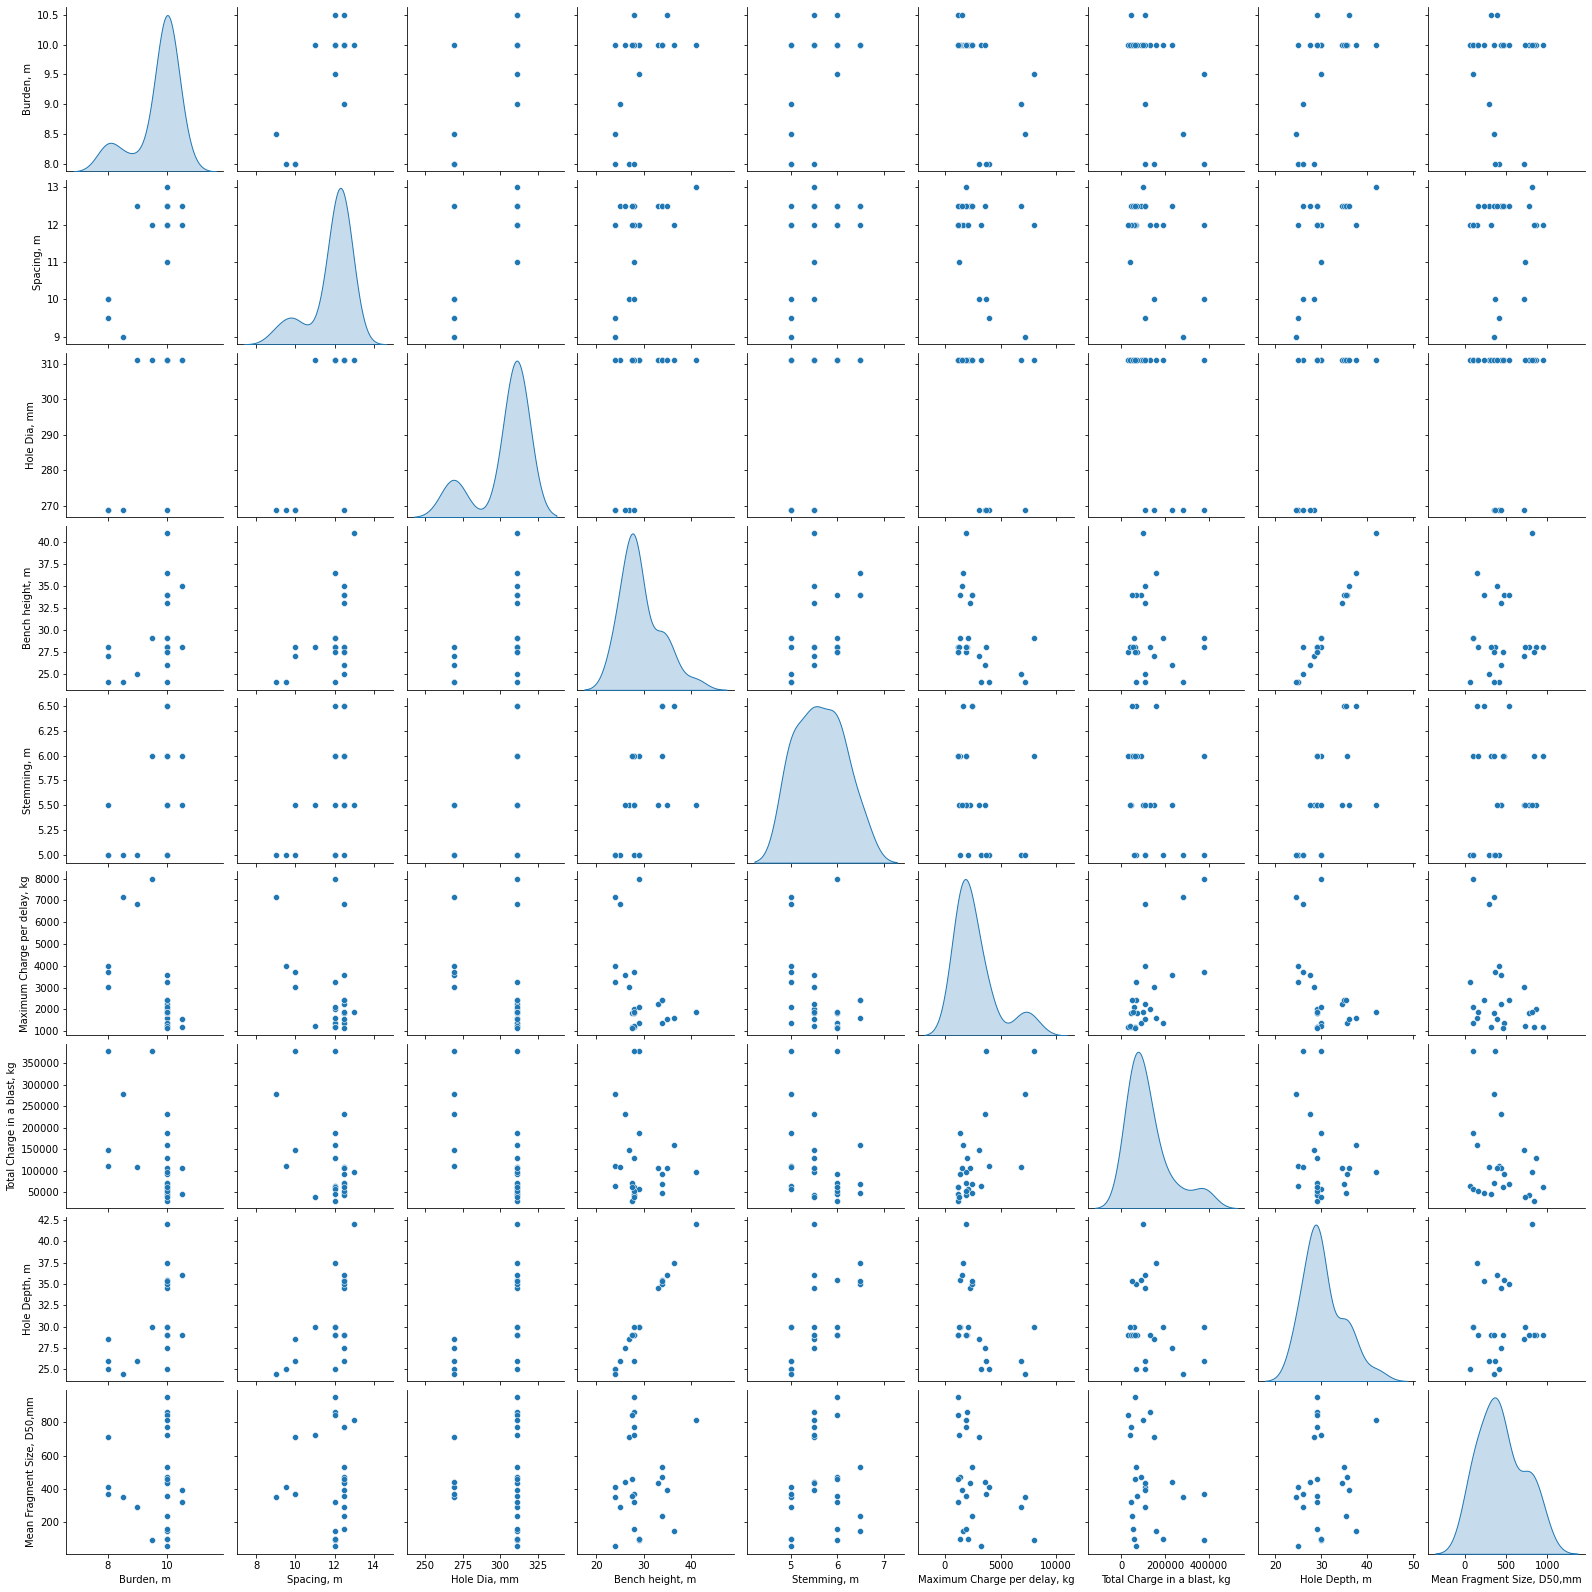

In [52]:
sns.pairplot(modified_data,diag_kind='kde')

Here we can see there are few outliers, we are not going to deal with those right now.

### Step 3: Seperating data  into inputs(x) and outputs(y) for further analysis

In [56]:
x = modified_data.iloc[0:,0:8]

In [57]:
y = modified_data.iloc[0:,8:9]


In [59]:
x

,"Burden, m","Spacing, m","Hole Dia, mm","Bench height, m","Stemming, m","Maximum Charge per delay, kg","Total Charge in a blast, kg","Hole Depth, m"
0,10.0,12.0,311.0,29.0,5.0,1385.00,187356.00,30.0
1,8.0,9.5,269.0,24.0,5.0,3967.50,109513.20,25.0
2,9.0,12.5,311.0,25.0,5.0,6853.00,108760.10,26.0
3,10.0,12.0,311.0,24.0,5.0,3235.50,64950.75,25.0
4,8.5,9.0,269.0,24.0,5.0,7153.74,278835.60,24.5
5,9.5,12.0,311.0,29.0,6.0,7996.00,377068.00,30.0
6,8.0,10.0,269.0,27.0,5.5,3020.00,148135.50,28.5
7,10.0,12.5,269.0,26.0,5.5,3600.00,230400.00,27.5
8,10.0,12.0,311.0,28.0,5.5,2000.00,130161.00,29.0
9,8.0,10.0,269.0,28.0,5.0,3703.00,377068.00,26.0


In [60]:
y

,"Mean Fragment Size, D50,mm"
0,99.1000
1,411.8900
2,294.2032
3,56.6100
4,354.9700
5,95.0300
6,713.4600
7,442.6300
8,858.9600
9,367.8000


### Step 4: Spliting the data into training and testing for model generation

In [62]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [63]:
xtrain

,"Burden, m","Spacing, m","Hole Dia, mm","Bench height, m","Stemming, m","Maximum Charge per delay, kg","Total Charge in a blast, kg","Hole Depth, m"
20,10.0,12.5,311.0,28.0,5.5,1850.00,44354.00,29.0
4,8.5,9.0,269.0,24.0,5.0,7153.74,278835.60,24.5
2,9.0,12.5,311.0,25.0,5.0,6853.00,108760.10,26.0
21,10.0,11.0,311.0,28.0,5.5,1252.25,37922.50,30.0
6,8.0,10.0,269.0,27.0,5.5,3020.00,148135.50,28.5
14,10.0,12.0,311.0,29.0,5.0,2094.00,56046.25,30.0
7,10.0,12.5,269.0,26.0,5.5,3600.00,230400.00,27.5
23,10.0,12.5,311.0,27.5,6.0,1150.00,62460.00,29.0
1,8.0,9.5,269.0,24.0,5.0,3967.50,109513.20,25.0
16,10.5,12.0,311.0,28.0,6.0,1189.75,44816.25,29.0


In [64]:
ytrain

,"Mean Fragment Size, D50,mm"
20,772.5700
4,354.9700
2,294.2032
21,725.2900
6,713.4600
14,102.6100
7,442.6300
23,460.2000
1,411.8900
16,321.2600


In [65]:
xtest

,"Burden, m","Spacing, m","Hole Dia, mm","Bench height, m","Stemming, m","Maximum Charge per delay, kg","Total Charge in a blast, kg","Hole Depth, m"
18,10.0,12.5,311.0,27.5,6.0,1850.00,70021.50,29.0
13,10.0,12.0,311.0,28.0,6.0,1212.25,61951.75,29.0
17,10.0,12.5,311.0,34.0,6.5,2417.00,48390.25,35.4
3,10.0,12.0,311.0,24.0,5.0,3235.50,64950.75,25.0
22,10.0,12.5,311.0,28.0,6.0,1900.00,52310.00,29.0
10,10.0,12.0,311.0,36.5,6.5,1600.00,159904.75,37.5
19,10.0,12.0,311.0,27.5,6.0,1202.25,29862.50,29.0


In [66]:
ytest

,"Mean Fragment Size, D50,mm"
18,357.620
13,951.940
17,236.790
3,56.610
22,157.930
10,149.215
19,842.550


In [67]:
regressionmodel = LinearRegression()
regressionmodel.fit(xtrain,ytrain)

LinearRegression()

In [69]:
for idx,columnames in  enumerate(xtrain.columns):
    print(f'The coefficient of {columnames} is {regressionmodel.coef_[0][idx]}')

The coefficient of Burden, m is -101.58757846257754
The coefficient of Spacing, m is 9.70418026813728
The coefficient of Hole Dia, mm is -3.5426211497260294
The coefficient of Bench height, m is -16.991331394051414
The coefficient of Stemming, m is 102.31855515959766
The coefficient of Maximum Charge per delay, kg is -0.02726075043694157
The coefficient of Total Charge in a blast, kg is -0.000780387238736831
The coefficient of Hole Depth, m is 31.49995262146533


In [70]:
regressionmodel.coef_

array([[-1.01587578e+02,  9.70418027e+00, -3.54262115e+00,
        -1.69913314e+01,  1.02318555e+02, -2.72607504e-02,
        -7.80387239e-04,  3.14999526e+01]])

In [73]:
intercept = regressionmodel.intercept_

In [74]:
intercept

array([1548.96034698])

In [92]:
blast = pd.read_csv("C:\\Users\\babhi\\OneDrive\\Desktop\\AI-ML\\Linear Regression\\input blasting data.csv")

In [100]:

blast = blast.drop(['Powe'],axis=1)

In [101]:
blast = blast.drop(['Cupdensity'],axis=1)

In [105]:
blast = blast.iloc[0:26,0:9]
blast

,Burden,Spacing,Holedia,Benchheight,Stemming,mcpd,tcib,Holedepth,MFS
0,10.0,12.0,311.0,29,5.0,1385.00,187356.00,30.0,99.1000
1,8.0,9.5,269.0,24,5.0,3967.50,109513.20,25.0,411.8900
2,9.0,12.5,311.0,25,5.0,6853.00,108760.10,26.0,294.2032
3,10.0,12.0,311.0,24,5.0,3235.50,64950.75,25.0,56.6100
4,8.5,9.0,269.0,24,5.0,7153.74,278835.60,24.5,354.9700
5,9.5,12.0,311.0,29,6.0,7996.00,377068.00,30.0,95.0300
6,8.0,10.0,269.0,27,5.5,3020.00,148135.50,28.5,713.4600
7,10.0,12.5,269.0,26,5.5,3600.00,230400.00,27.5,442.6300
8,10.0,12.0,311.0,28,5.5,2000.00,130161.00,29.0,858.9600
9,8.0,10.0,269.0,28,5.0,3703.00,377068.00,26.0,367.8000


In [107]:
result = smf.ols(formula='MFS ~ Burden + Spacing + Holedia + Benchheight + Stemming + mcpd + tcib + Holedepth ',data= blast)

In [109]:
res = result.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MFS   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                 -0.156
Method:                 Least Squares   F-statistic:                    0.8124
Date:                Wed, 09 Nov 2022   Prob (F-statistic):              0.663
Time:                        19:06:45   Log-Likelihood:                -166.93
No. Observations:                  26   AIC:                             371.9
Df Residuals:                       7   BIC:                             395.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2934.8676   4131.998     -0.710      0.501   -1.27e+04    6835.756
Benchheight[T.25]    -178.2854    649.545     -0.274      0.792   -1714.216    1357.645
Benchheight[T.26]    1348.0994   1860.726      0.725      0.492   -3051.818    5748.017
Benchheight[T.27]     222.0148   1096.810      0.202      0.845   -2371.528    2815.557
Benchheight[T.27.5]   229.8908    970.311      0.237      0.819   -2064.530    2524.311
Benchheight[T.28]     198.6988    911.287      0.218      0.834   -1956.151    2353.549
Benchheight[T.29]    -476.6548   1192.420     -0.400      0.701   -3296.280    2342.971
Benchheight[T.33]    -331.9454   2194.520     -0.151      0.884   -5521.161    4857.270
Benchheight[T.34]    -338.7479   2292.675     -0.148      0.887   -5760.062    5082.566
Benchheight[T.35]    -320.5441   2594.746     -0.124      0.905   -6456.143    5815.054
Benchheight[T.36.5]  -867.5929   2828.477     -0.307      0.768   -7555.878    5820.692
Benchheight[T.41]    -439.4973   3949.361     -0.111      0.915   -9778.253    8899.258
Burden               -346.5909    439.231     -0.789      0.456   -1385.207     692.025
Spacing              -242.0528    279.972     -0.865      0.416    -904.080     419.975
Holedia                25.6891     31.347      0.820      0.440     -48.434      99.813
Stemming             -101.0480    362.396     -0.279      0.788    -957.978     755.882
mcpd                   -0.0009      0.112     -0.008      0.994      -0.265       0.263
tcib                   -0.0002      0.002     -0.106      0.918      -0.005       0.005
Holedepth              80.6663    224.794      0.359      0.730    -450.888     612.221
==============================================================================
Omnibus:                        0.833   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.204
Skew:                           0.196   Prob(JB):                        0.903
Kurtosis:                       3.188   Cond. No.                     2.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5: Ploting Best fit line

In [131]:
xips1 = xtrain['Bench height, m']
yips = ytrain

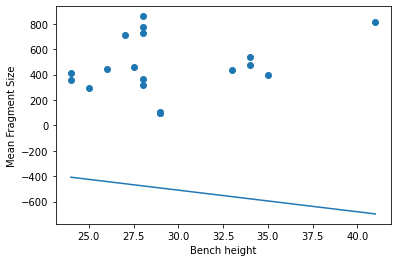

[-407.79195346 -696.64458716] [24. 41.]


,"Mean Fragment Size, D50,mm"
20,772.5700
4,354.9700
2,294.2032
21,725.2900
6,713.4600
14,102.6100
7,442.6300
23,460.2000
1,411.8900
16,321.2600


In [167]:
plt.scatter(xips1,yips)
plt.xlabel('Bench height')
plt.ylabel('Mean Fragment Size')
mini = xips1.min()
maxi = xips1.max()
xbf = np.array([mini,maxi])
coef = -16.991331394051414
ybf = xbf*coef
ybf
plt.plot(xbf,ybf)
plt.show()
print(ybf,xbf )
xips1
yips

20    28.0
4     24.0
2     25.0
21    28.0
6     27.0
14    29.0
7     26.0
23    27.5
1     24.0
16    28.0
0     29.0
15    34.0
25    35.0
24    41.0
9     28.0
8     28.0
12    34.0
11    33.0
5     29.0
Name: Bench height, m, dtype: float64

Text(0, 0.5, 'Mean Fragment size')

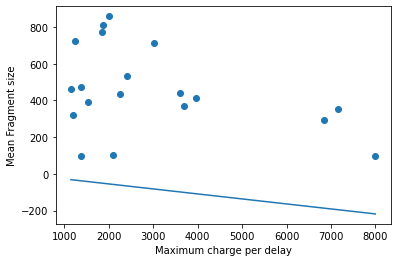

In [186]:
xips2 =  xtrain['Maximum Charge per delay, kg']
plt.scatter(xips2,yips)
x2bf = np.array([xips2.min(),xips2.max()])
y2bf = x2bf*-0.02726075043694157
plt.plot(x2bf,y2bf)
plt.xlabel('Maximum charge per delay')
plt.ylabel('Mean Fragment size')

Text(0, 0.5, 'Mean Fragment size')

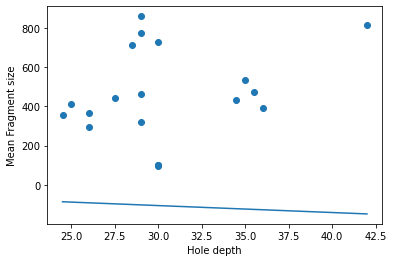

In [185]:
xips3 = xtrain['Hole Depth, m']
plt.scatter(xips3,yips)
x3bf = np.array([xips3.min(),xips3.max()])
y3bf = x3bf*-3.5426211497260294
plt.plot(x3bf,y3bf)
plt.xlabel('Hole depth')
plt.ylabel('Mean Fragment size')

In [1]:
xips4 = xtrain['Total Charge in a blast, kg']
plt.scatter(xips4,yips)
x4bf = np.array([xips4.min(),xips4.max()])
y4bf = x4bf*-0.000780387238736831
plt.plot(x4bf,y4bf)
plt.xlabel('Total charge per blast')
plt.ylabel('Mean Fragment size')


NameError: name 'xtrain' is not defined

In [21]:
xips5 = xtrain['Burden, m']
plt.scatter(xips5,yips)
x5bf = np.array([xips5.min(),xips5.max()])
y5bf = x5bf*(-101.58757846257754)
plt.xlabel('Burden')
plt.ylabel('Mean Fragment size')
plt.plot(x5bf,y5bf)
print(x5bf,y5bf)
xips5


NameError: name 'xtrain' is not defined

[ 9. 13.]


Text(0, 0.5, 'Mean Fragment size')

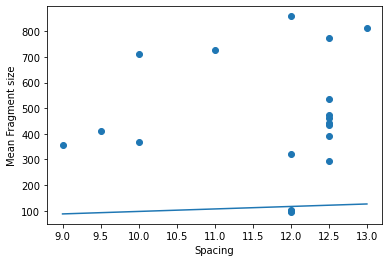

In [181]:
xips6 = xtrain['Spacing, m']
plt.scatter(xips6,yips)
x6bf = np.array([xips6.min(),xips6.max()])
y6bf = x6bf*9.70418026813728
plt.plot(x6bf,y6bf)
print(x6bf)
plt.xlabel('Spacing')
plt.ylabel('Mean Fragment size')

In [2]:
import matplotlib.pyplot as plt


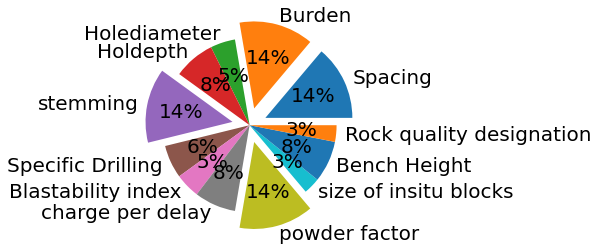

In [11]:
nums = [9,9,3,5,9,4,3,5,9,2,5,2]
lab = ['Spacing','Burden','Holediameter','Holdepth','stemming','Specific Drilling','Blastability index','charge per delay','powder factor','size of insitu blocks','Bench Height','Rock quality designation']
exp = [0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0]
plt.pie(nums,labels=lab,explode=exp,autopct='%1.0f%%')

plt.show()

In [9]:
exp = [0.0]*13

In [12]:
import matplotlib.pyplot as plt

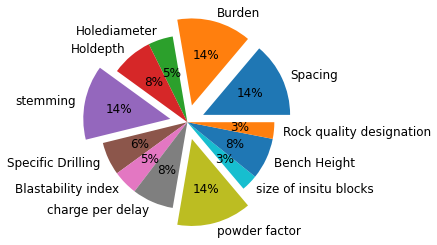

In [20]:
nums = [9,9,3,5,9,4,3,5,9,2,5,2]
lab = ['Spacing','Burden','Holediameter','Holdepth','stemming','Specific Drilling','Blastability index','charge per delay','powder factor','size of insitu blocks','Bench Height','Rock quality designation']
exp = [0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0]
plt.pie(nums,labels=lab,explode = exp,autopct='%1.0f%%')
plt.rcParams['font.size'] = 12
plt.show()